<a href="https://colab.research.google.com/github/Yassaadel/Depi.gov/blob/master/Task(Image%20Preprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

In [2]:
fox_files = glob('/animal-totem-_renard.webp')

In [4]:
img_mpl = plt.imread('/animal-totem-_renard.webp')
img_mpl.shape

(400, 800, 3)

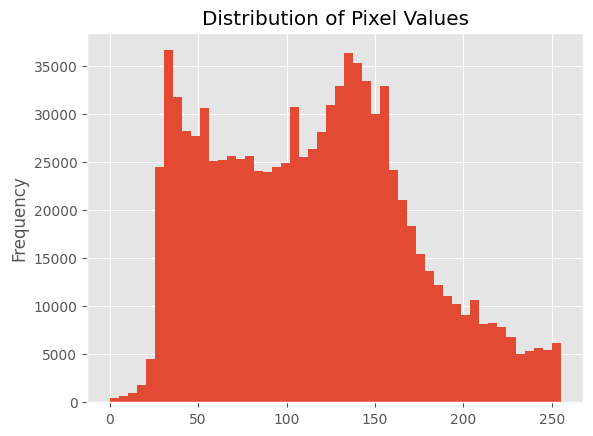

In [5]:
pd.Series(img_mpl.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

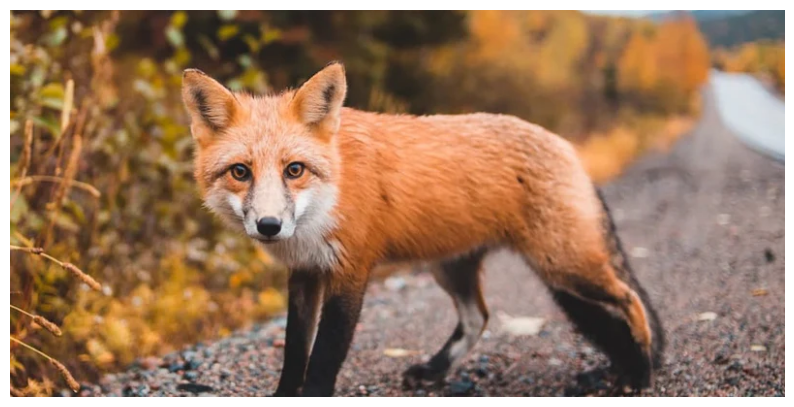

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

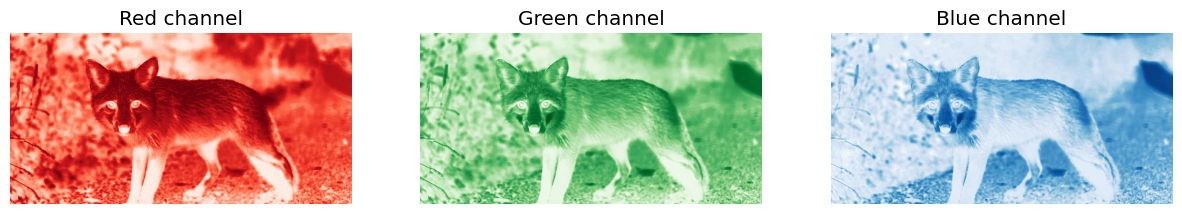

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

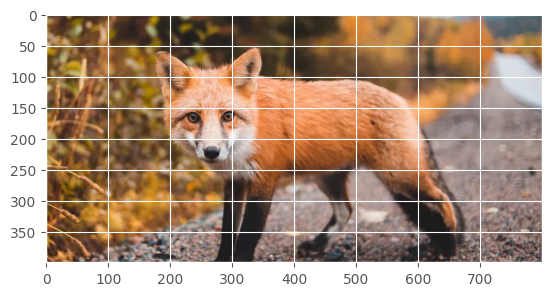

In [14]:
img_mpl = cv2.cvtColor(img_mpl, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_mpl)
ax.axis('on')
plt.show()

400 800


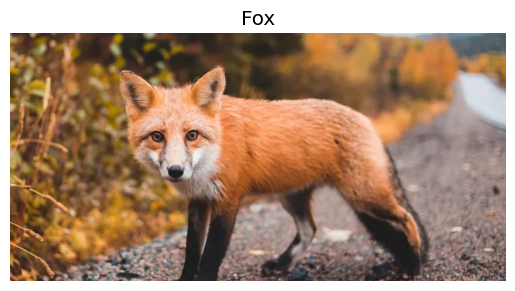

In [15]:
image = cv2.imread('/animal-totem-_renard.webp')
height, width = image.shape[:2]
print(height, width)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Fox')


plt.show()

In [16]:
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
# Affine Transformations
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

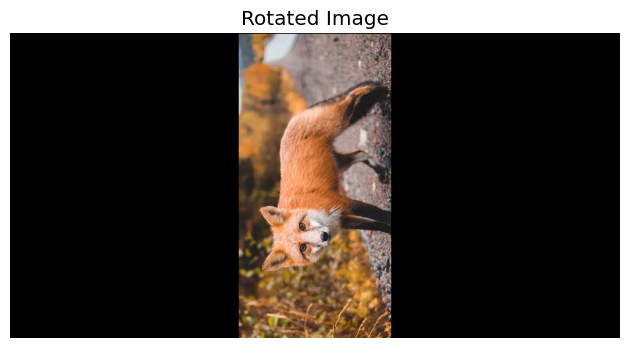

(400, 800)

In [18]:
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Rotated Image')

plt.tight_layout()
plt.show()


height, width

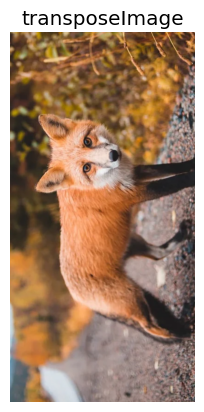

In [19]:
imagetranspose = cv2.transpose(image)

plt.imshow(cv2.cvtColor(imagetranspose, cv2.COLOR_BGR2RGB))
plt.title('transposeImage')
plt.axis('off')

plt.show()

Flipping

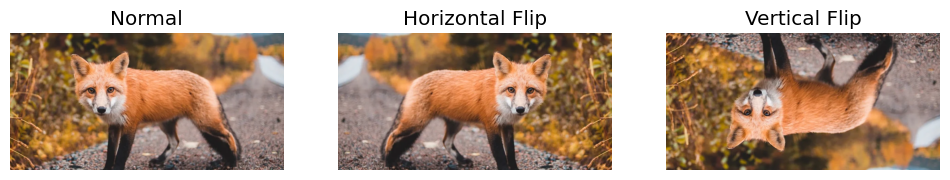

In [20]:
plt.figure(figsize= (12, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Normal')



plt.subplot(1, 3, 2)
hflip_img = cv2.flip(image, 1)
plt.imshow(cv2.cvtColor(hflip_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Horizontal Flip')



plt.subplot(1, 3, 3)
vflip_img = cv2.flip(image, 0)
plt.imshow(cv2.cvtColor(vflip_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Vertical Flip')

plt.show()

Normal shape: (400, 800, 3)
Linear Interpolation shape: (60, 120, 3)
Cubic Interpolation shape: (800, 1600, 3)
Area Interpolation shape: (800, 1600, 3)


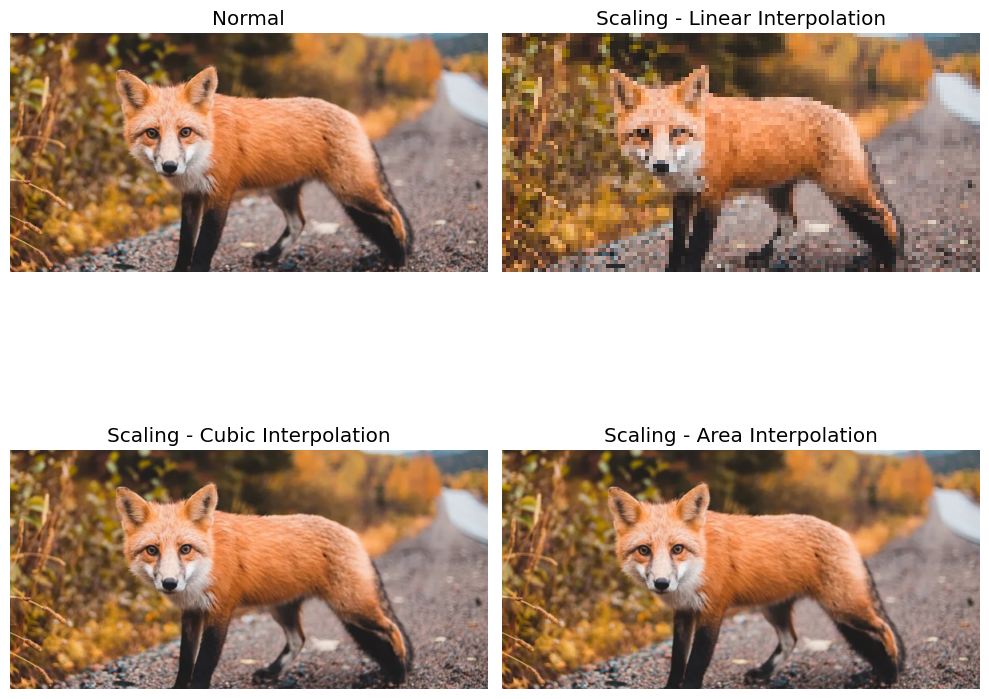

In [21]:
plt.figure(figsize=(10, 10))

# Normal Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Normal')
print(f'Normal shape: {image.shape}')




# Let's make our image 3/4 of it's original size
plt.subplot(2, 2, 2)
image_scaled = cv2.resize(image, None, fx=0.15, fy=0.15, interpolation = cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(image_scaled, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Scaling - Linear Interpolation')
print(f'Linear Interpolation shape: {image_scaled.shape}')








# Let's double the size of our image
plt.subplot(2, 2, 3)
img_scaled_v1 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(img_scaled_v1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Scaling - Cubic Interpolation')
print(f'Cubic Interpolation shape: {img_scaled_v1.shape}')




# Let's double the size of our image
plt.subplot(2, 2, 4)
img_scaled_v2 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(img_scaled_v2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Scaling - Area Interpolation')
print(f'Area Interpolation shape: {img_scaled_v2.shape}')

plt.tight_layout()
plt.show()

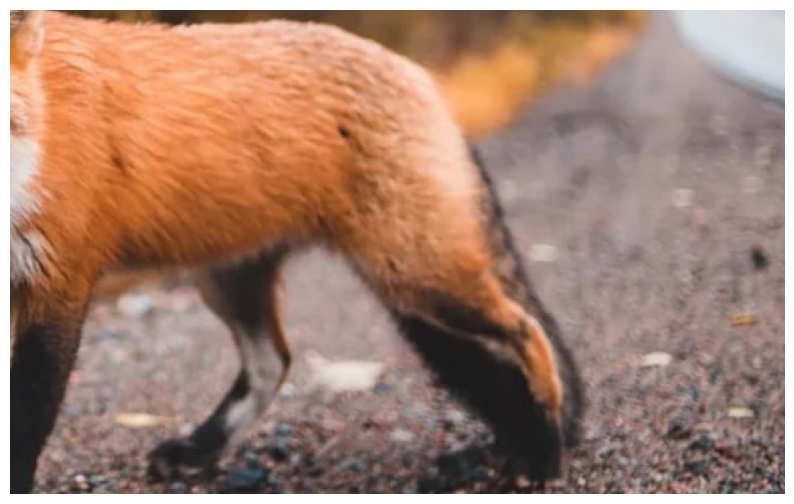

In [22]:
#Cropping

height, width = image.shape[:2]
s_row, s_col = 100, 320
e_row, e_col = height, width
crop_img = image[s_row:e_row, s_col:e_col]



plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

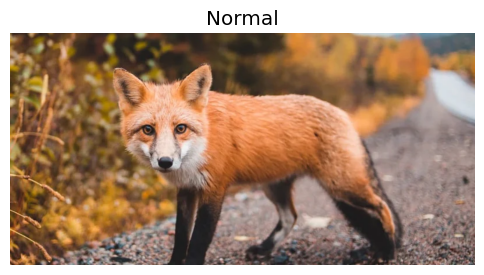

In [23]:
plt.figure(figsize=(6, 6))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Normal')
plt.show()

In [24]:
kernel_3x3 = np.ones((3, 3), np.float32) / 9
kernel_7x7 = np.ones((7, 7), np.float32) / 49

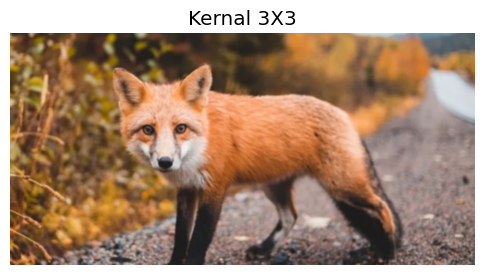

In [25]:
# Kernel with 3x3
plt.figure(figsize=(6, 6))

blur3_img = cv2.filter2D(image, -1, kernel_3x3)
#blur3_img = cv2.blur(image, (3, 3))
plt.imshow(cv2.cvtColor(blur3_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Kernal 3X3')
plt.show()

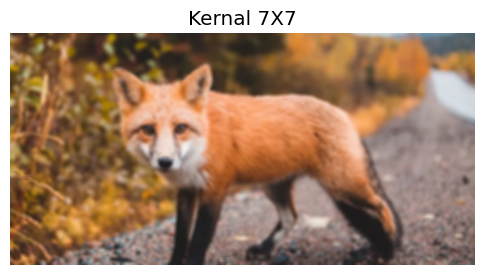

In [26]:
# Kernel with 7x7
plt.figure(figsize=(6, 6))

blur7_img = cv2.filter2D(image, -1, kernel_7x7)
#blur7_img = cv2.blur(image, (7, 7))
plt.imshow(cv2.cvtColor(blur7_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Kernal 7X7')
plt.show()

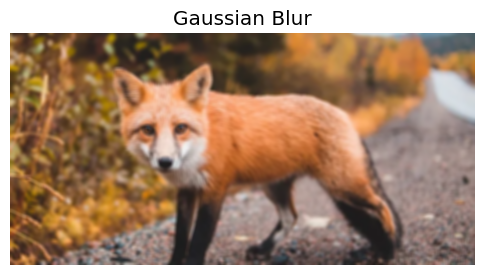

In [27]:
# Gaussian with 7x7
plt.figure(figsize=(6, 6))

Gaussian = cv2.GaussianBlur(image, (7,7), 5)
plt.imshow(cv2.cvtColor(Gaussian, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Gaussian Blur')
plt.show()

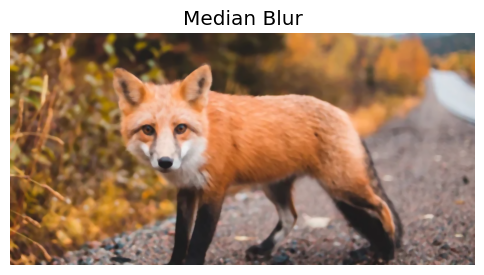

In [30]:
# Median with 7x7
# Takes median of all the pixels under kernel area and central element is replaced with this median value.

plt.figure(figsize=(6, 6))

Median = cv2.medianBlur(image, 5)
plt.imshow(cv2.cvtColor(Median, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Median Blur')
plt.show()


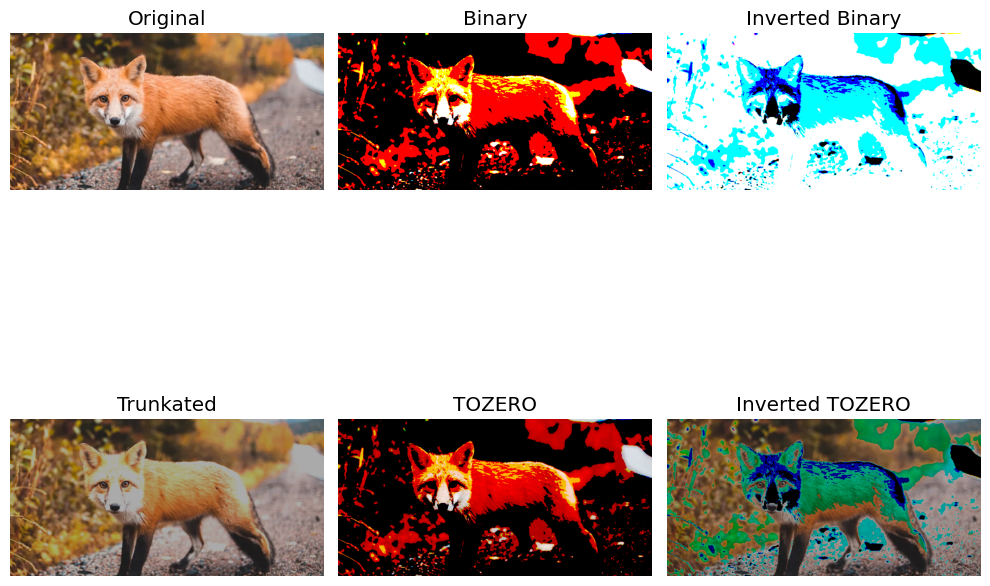

In [31]:
plt.figure(figsize=(10, 10))

# Normal Image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

# Binary Threshold
plt.subplot(2, 3, 2)
ret1, thresh1 = cv2.threshold(image, 170, 255, cv2.THRESH_BINARY)
# Pixels with intensities greater than the threshold are set to a maximum value (maxval 255),
# and those less than or equal to the threshold are set to zero.
plt.imshow(cv2.cvtColor(thresh1, cv2.COLOR_BGR2RGB))
plt.title('Binary')
plt.axis('off')








# Inverted Binary Threshold
plt.subplot(2, 3, 3)
ret2, thresh2 = cv2.threshold(image, 170, 255, cv2.THRESH_BINARY_INV)
# Inverse of binary thresholding. Pixels with intensities greater than the threshold are set to zero,
# and those less than or equal to the threshold are set to a maximum value (maxval).
plt.imshow(cv2.cvtColor(thresh2, cv2.COLOR_BGR2RGB))
plt.title('Inverted Binary')
plt.axis('off')

# Trunkated Threshold
plt.subplot(2, 3, 4)
ret3, thresh3 = cv2.threshold(image, 170, 255, cv2.THRESH_TRUNC)
# Pixels with intensities greater than the threshold are set to the threshold value,
# and those less than or equal to the threshold remain unchanged.
plt.imshow(cv2.cvtColor(thresh3, cv2.COLOR_BGR2RGB))
plt.title('Trunkated')
plt.axis('off')












# To Zero Threshold
plt.subplot(2, 3, 5)
ret4, thresh4 = cv2.threshold(image, 170, 225, cv2.THRESH_TOZERO)
# Pixels with intensities greater than the threshold remain unchanged,
# and those less than or equal to the threshold are set to zero.
plt.imshow(cv2.cvtColor(thresh4, cv2.COLOR_BGR2RGB))
plt.title('TOZERO')
plt.axis('off')




# Inverted To Zero Threshold
plt.subplot(2, 3, 6)
ret5, thresh5 = cv2.threshold(image, 170, 225, cv2.THRESH_TOZERO_INV)
# Inverse of To Zero Thresholding. Pixels with intensities greater than the threshold are set to zero,
# and those less than or equal to the threshold remain unchanged.
plt.imshow(cv2.cvtColor(thresh5, cv2.COLOR_BGR2RGB))
plt.title('Inverted TOZERO')
plt.axis('off')

plt.tight_layout()
plt.show()

